### CS767 - Project 1
#### Ben Weeks

In [2]:
%matplotlib inline
from numpy import dot, random, polyfit
from numpy.linalg import norm
from matplotlib.pyplot import plot, show

class Perceptron(object):
    def __init__(self):
        self.w = random.rand(2)*2-1  # weight for a 2d problem
        print ("Initial Weights: {}".format(self.w))
        self.eta = 0.1
        pass

    def __unit_step(self, x):
        result = x[0] * self.w[0] + x[1] * self.w[1]
        if (result >= 0):
            return 1
        else:
            return -1

    def update_weights(self, x, delta_error):
        self.w[0] += self.eta * delta_error * x[0]
        self.w[1] += self.eta * delta_error * x[1]

    def train(self, training_data, reverse = False):
        """
        Trains off of training_data, must be array w/3 elements.
        3rd element is expected output.
        """
        learned = False
        i = 0
        u_w = 0
        if reverse == True:
            training_data = training_data[::-1]
        while not learned:
            total_error = 0.0
            for x in training_data:
                result = self.__unit_step(x)
                if x[2] != result:
                    delta_error = x[2] - result
                    self.update_weights(x, delta_error)
                    u_w += 1
                    total_error += abs(delta_error)
            i += 1
            if total_error == 0.0 or i >= 100:
                print 'Training Iterations: {}'.format(i)
                print 'Weight Vector Updates: {}'.format(u_w)
                learned = True
    
    def run(self, test_data):
        print ("Final Weights: {}".format(self.w))
        for x in test_data:
            result = self.__unit_step(x)
            if result != x[2]:
                print 'Error'
            if result == 1:
                plot(x[0], x[1], c='r', marker='^')
            else:
                plot(x[0], x[1], c='b', marker='o')
                
        separation_norm = norm(perceptron.w)
        ww = perceptron.w/separation_norm
        x_slope = [ww[1], -ww[1]]
        y_slope = [-ww[0], ww[0]]
        plot(x_slope, y_slope, '--k')
        slope, intercept = polyfit(x_slope, y_slope, 1)
        print ("Slope: {}".format(slope))
        print ("Intercept: {}".format(intercept))

        show()
            
    def gen_data(self, n):
        """
        This method will create linearlly separable data sets in a 1:1 ratio.
        """
        gap = 0.45
        x_a = (random.rand(n) * 2 - 1) / 2 - gap
        x_b = (random.rand(n) * 2 - 1) / 2 + gap
        y_a = (random.rand(n) * 2 - 1) / 2 + gap
        y_b = (random.rand(n) * 2 - 1) / 2 - gap
        data = []
        for i in xrange(len(x_a)):
            data.append([x_a[i], y_a[i], 1])
            data.append([x_b[i], y_b[i], -1])
        return data

Now that we have a perceptron class with train and run functions, let's give it a shot:


Initial Weights: [-0.16595599  0.44064899]
Training Iterations: 36
Weight Vector Updates: 35
Final Weights: [-0.306111    0.13325781]
Slope: 2.29713354915
Intercept: -7.85046229342e-17


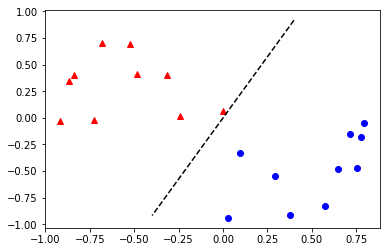

In [3]:
random.seed(1)
perceptron = Perceptron()
train_data = perceptron.gen_data(100)
test_data = perceptron.gen_data(10)
perceptron.train(train_data)
perceptron.run(test_data)

#### Are the training data points linearly separable?

Yes, they are. I created a data generating function that produces a gap between datasets, making them linearly seperable.

#### Are the test points are linearly separable?

Yes, see my response to the aboce quesiton.

#### Initial choice of the weights and constants.

I left the weight up to chance, using a random function to determine them. The constant was set to $\frac{1}{10}$.

#### The final solution equation of the line (decision boundary)

For this set it was $y=2.29713354915\,x - 7.85046229342 \cdot 10^{-17}$.


#### The total number of weight vector updates that your algorithm made.
For this set it was 35 iterations of the weight vector update portion of training.


#### The total number of iterations made over the training set, and
For this set it was 36 iterations over the training set.

#### The final misclassification error, if any, on the training data and also on the test data.

Unclear from my implementation, misclassification errors are not fully logged. Training runs until the global error count is 0 for the training set, or it goes through 100 iterations.

#### The initial choice of the weights,
Let's do this again:

Initial Weights: [-0.16595599  0.44064899]
Reset weights: [-0.63946062 -0.96104952]
Training Iterations: 3
Weight Vector Updates: 10
Final Weights: [-1.02563786  0.1877756 ]
Slope: 5.4620402153
Intercept: -7.85046229342e-17


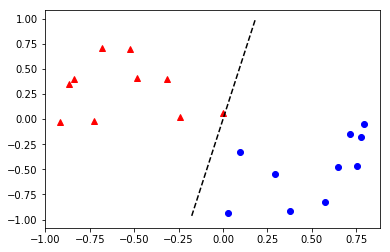

In [3]:
random.seed(1)
perceptron = Perceptron()
train_data = perceptron.gen_data(100)
test_data = perceptron.gen_data(10)
random.seed(11)
reset_weights = random.rand(2)*2-1
print ("Reset weights: {}".format(reset_weights))
perceptron.w = reset_weights
perceptron.train(train_data)
perceptron.run(test_data)

As we can see, this ran for a few iterations fewer. The weights were closer to the final weight, and the slope was a bit sharper.

#### The initial choice of the step size constant (c),
Let's do this again:

Initial Weights: [-0.16595599  0.44064899]
Training Iterations: 19
Weight Vector Updates: 18
Final Weights: [-0.31011543  0.12447521]
Slope: 2.4913830324
Intercept: -7.85046229342e-17


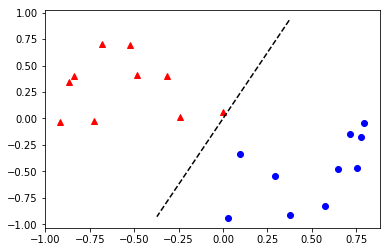

In [4]:
random.seed(1)
perceptron = Perceptron()
train_data = perceptron.gen_data(100)
test_data = perceptron.gen_data(10)
perceptron.eta = 0.2
perceptron.train(train_data)
perceptron.run(test_data)

It looks like the number of iterations decreased.

#### The order in which you consider the points in the training set.
Let's try this again:

Initial Weights: [-0.16595599  0.44064899]
Training Iterations: 36
Weight Vector Updates: 35
Final Weights: [-0.306111    0.13325781]
Slope: 2.29713354915
Intercept: -7.85046229342e-17


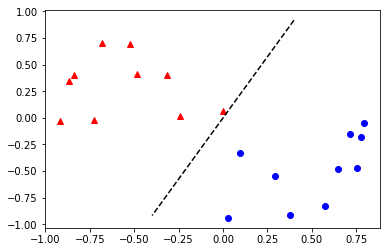

In [5]:
random.seed(1)
perceptron = Perceptron()
train_data = perceptron.gen_data(100)
test_data = perceptron.gen_data(10)
perceptron.train(train_data, True)
perceptron.run(test_data)

Nothing seems to have changed with this.